In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import random
from utils import *

% matplotlib inline

In [2]:
crimes = pd.read_csv("MontgomeryCountyCrime2013.csv")

In [3]:
classify_occurrences(crimes)

# Crimes/Offenses by City

In the cell bellow the percentage of the crime's profile is calculated by city. All crimes were  previously categorized into 26 categories. The graphs show the top 10 crimes occurrence by city on a pie chart, the remaining crimes are represented by the label: Not in the top 10s.

As we look in the graph we can see that 'Lacerny' is the crime with highest percentage in most of the citys,that is, 62,5% of the cities has it as the main crime.


DAMASCUS


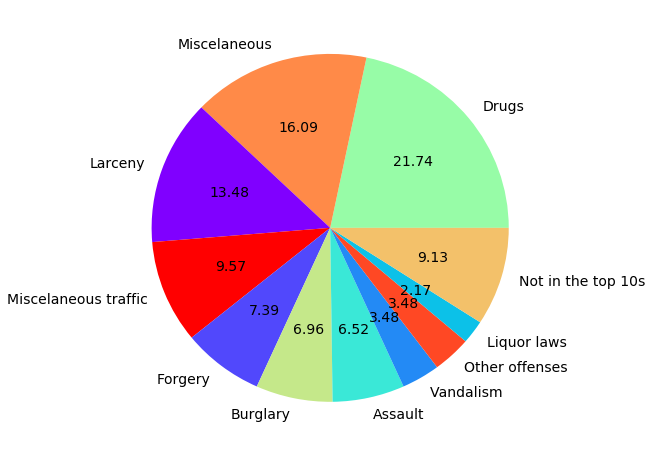

GERMANTOWN


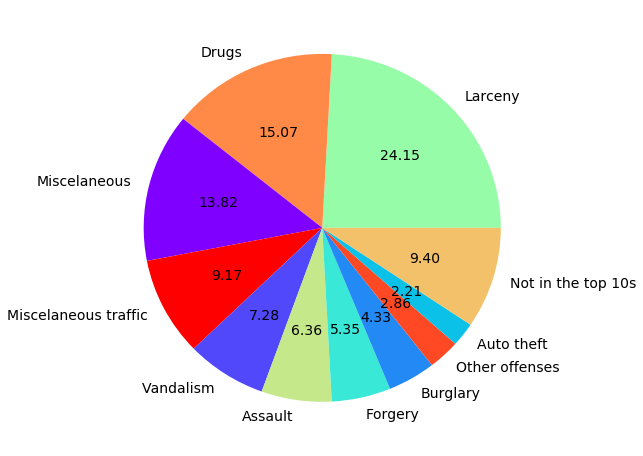

GAITHERSBURG


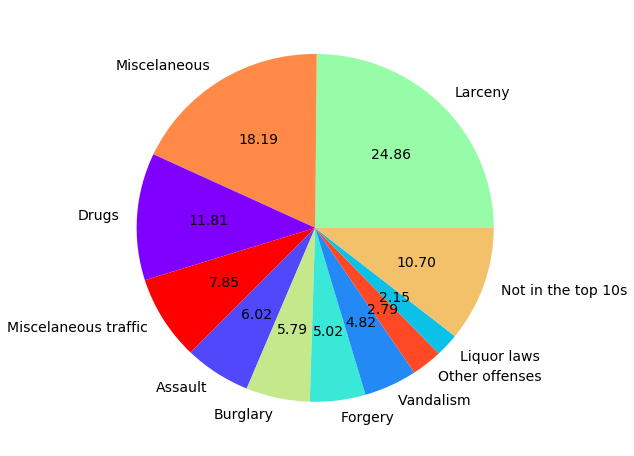

CHEVY CHASE


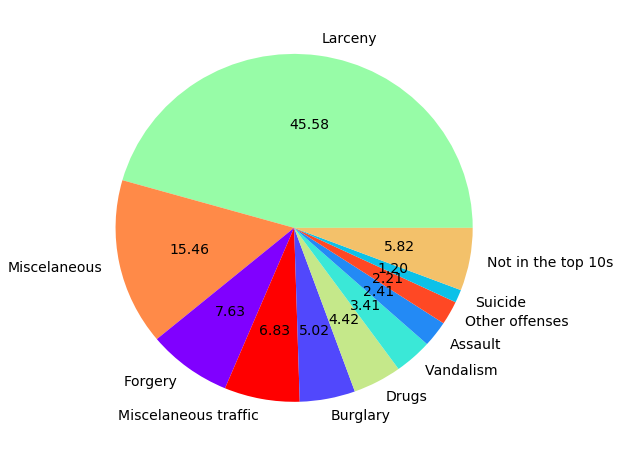

SILVER SPRING


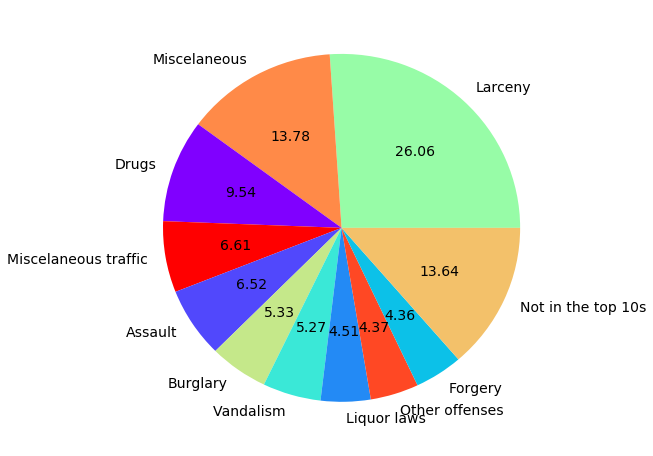

ROCKVILLE


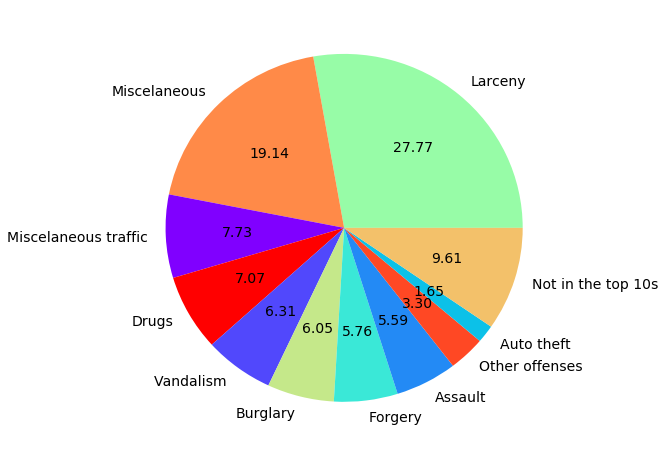

WASHINGTON GROVE


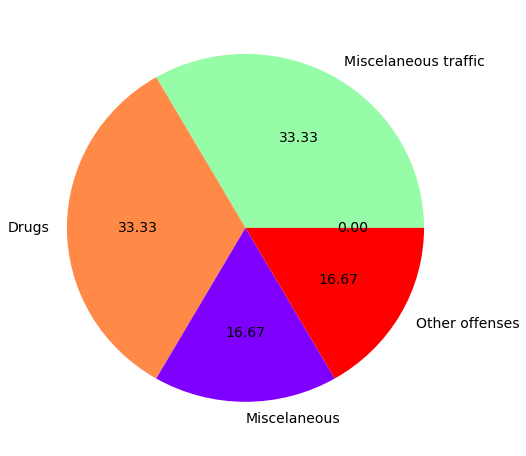

DERWOOD


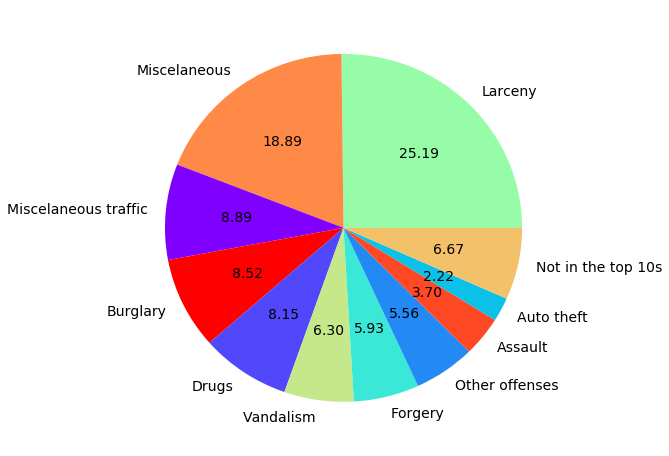

BETHESDA


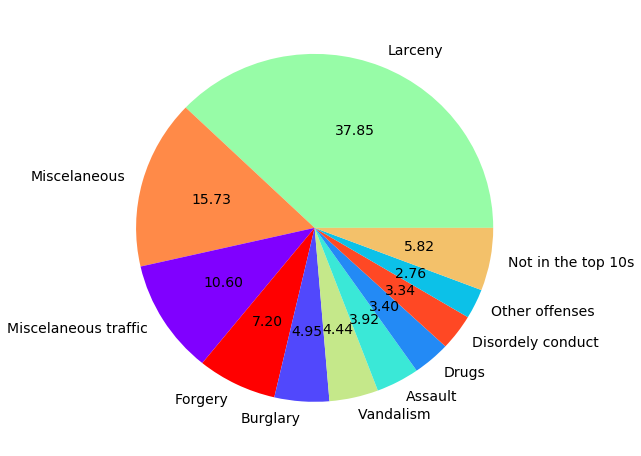

BOYDS


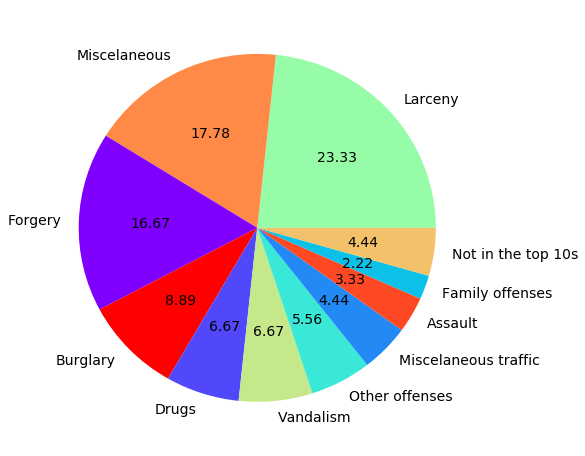

POTOMAC


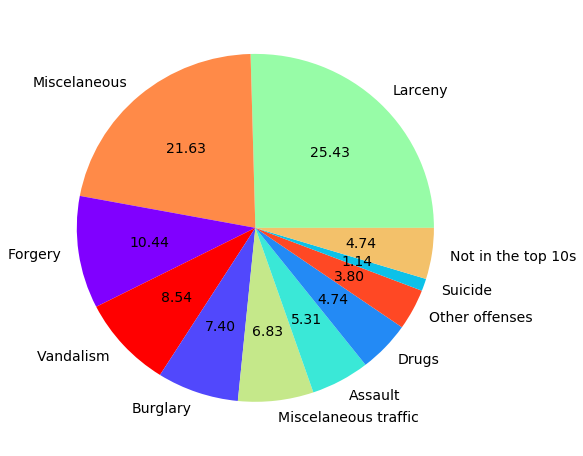

CLARKSBURG


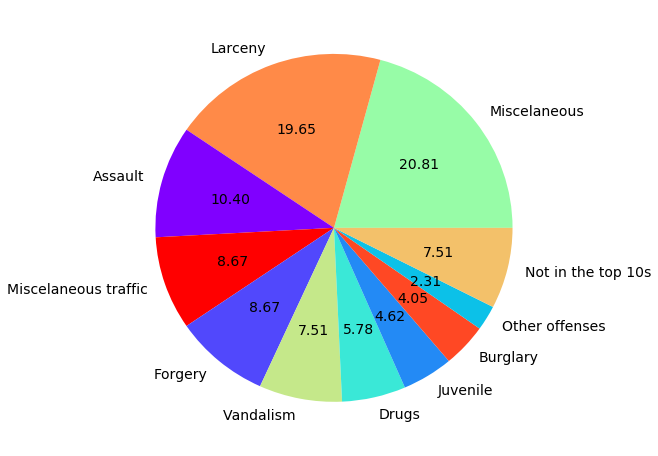

OLNEY


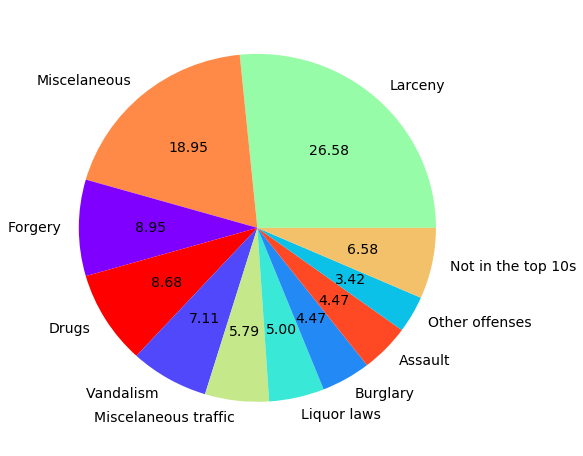

MONTGOMERY VILLAGE


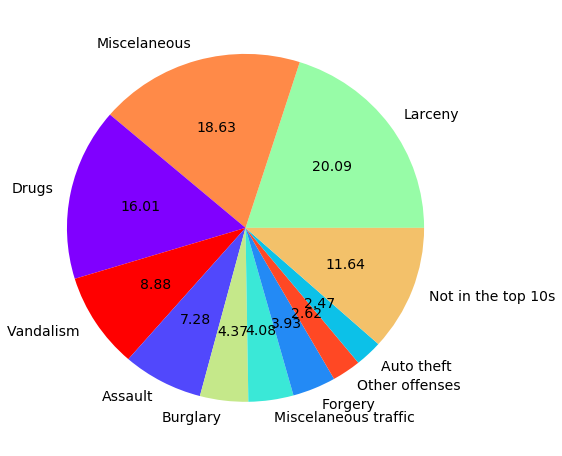

POOLESVILLE


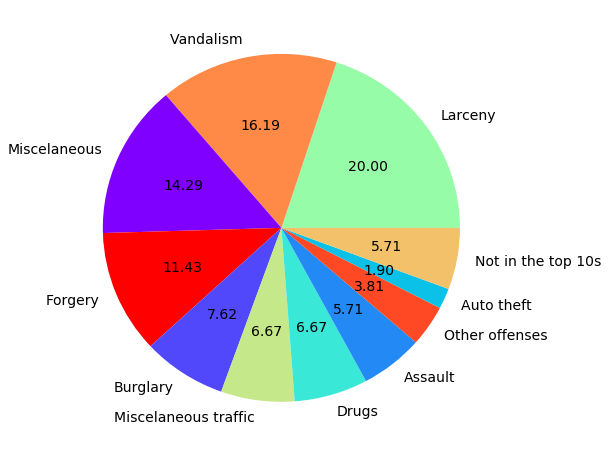

BURTONSVILLE


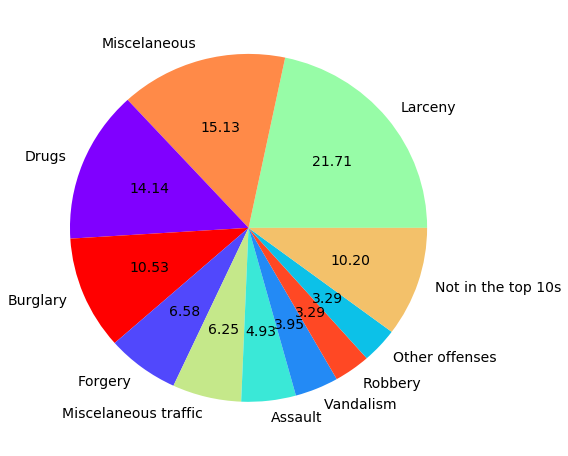

BROOKEVILLE


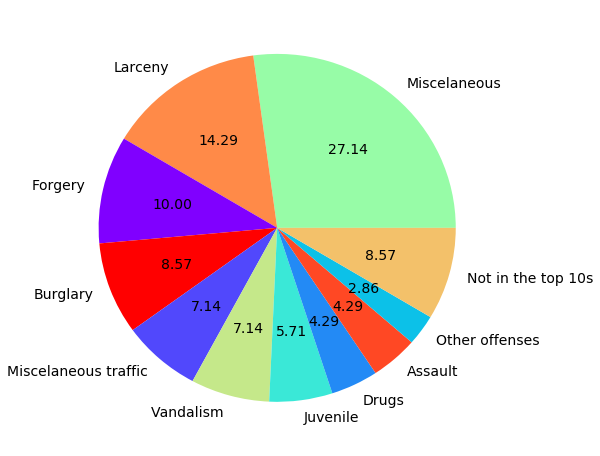

KENSINGTON


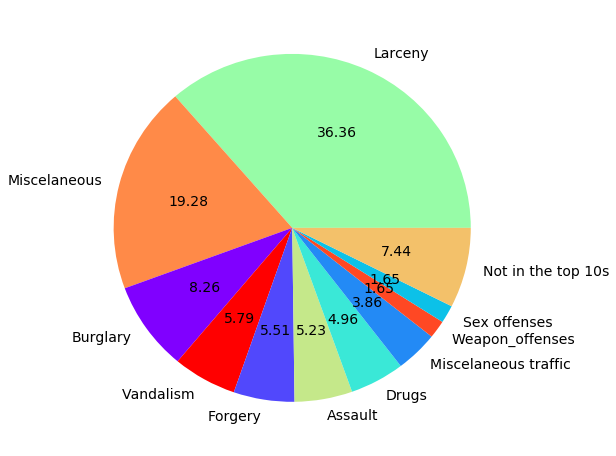

TAKOMA PARK


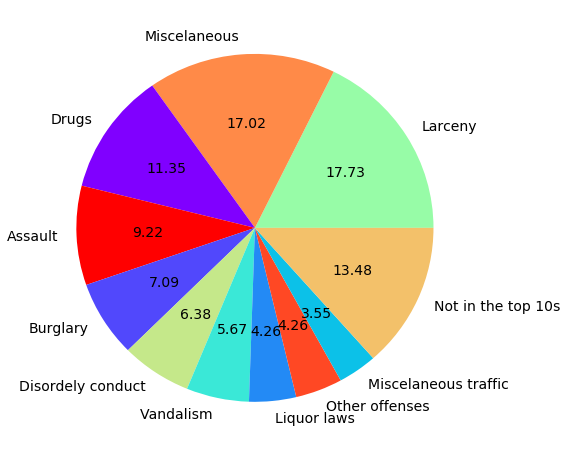

DICKERSON


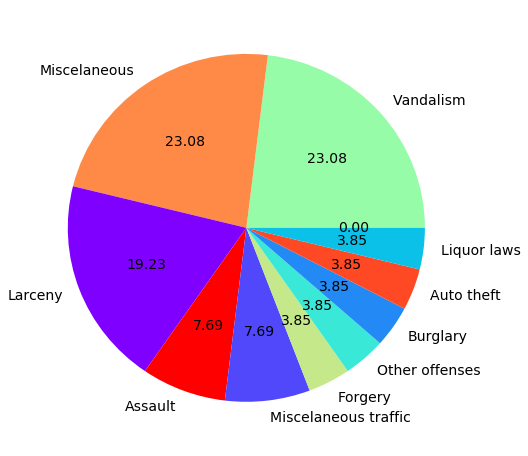

SANDY SPRING


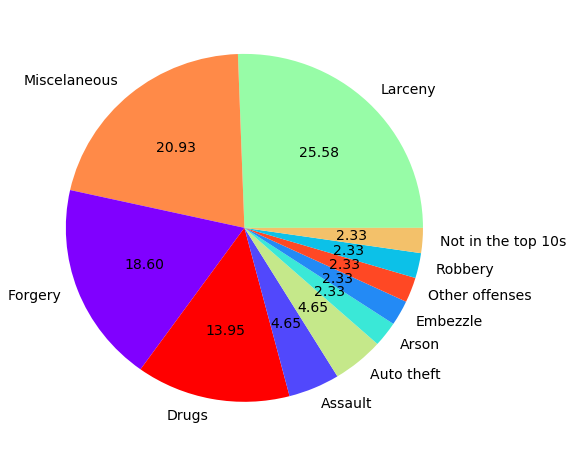

CABIN JOHN


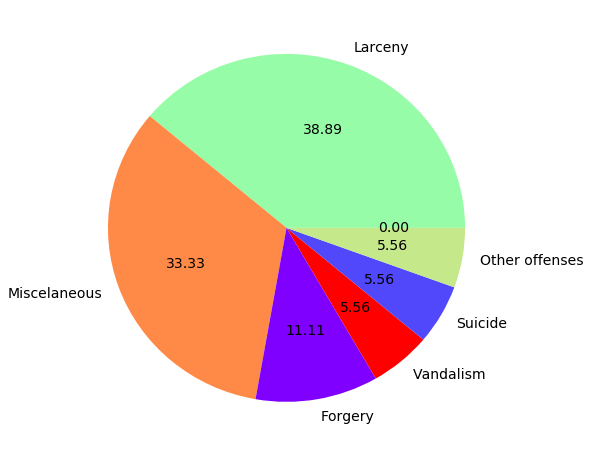

MOUNT AIRY


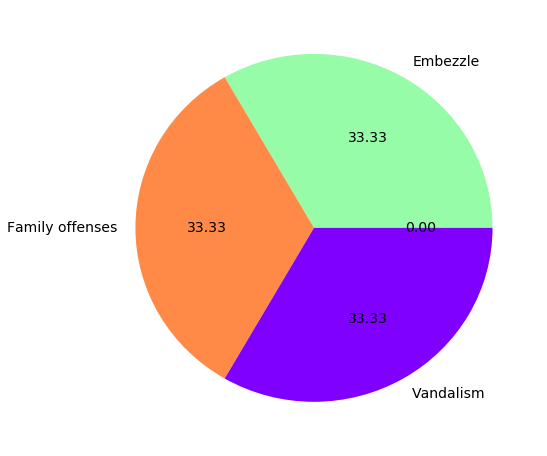

BRINKLOW


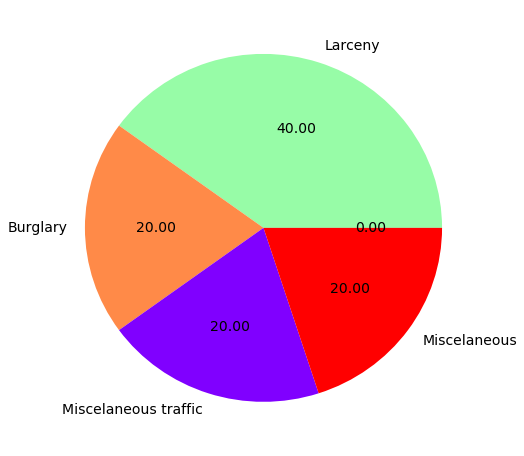

ASHTON


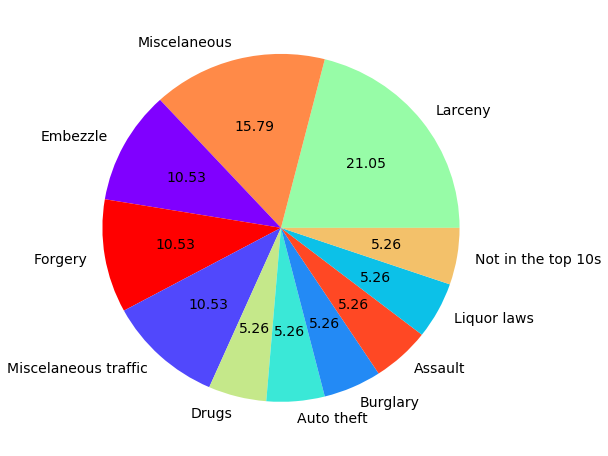

KISSIMMEE


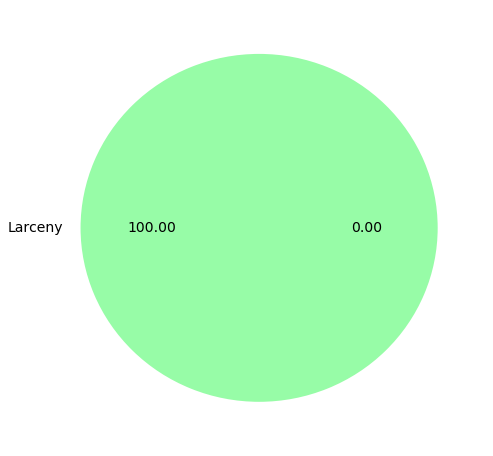

SPENCERVILLE


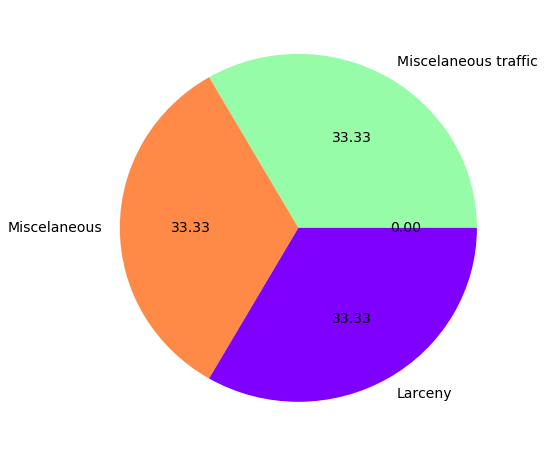

BARNESVILLE


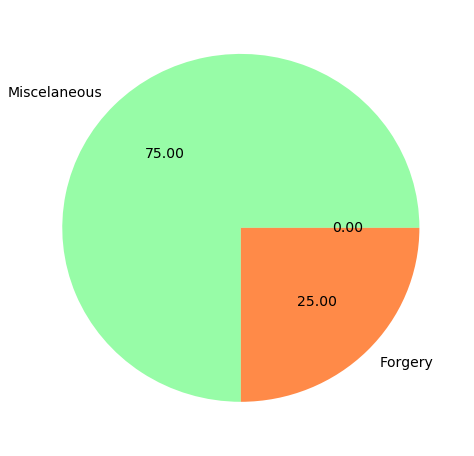

GLEN ECHO


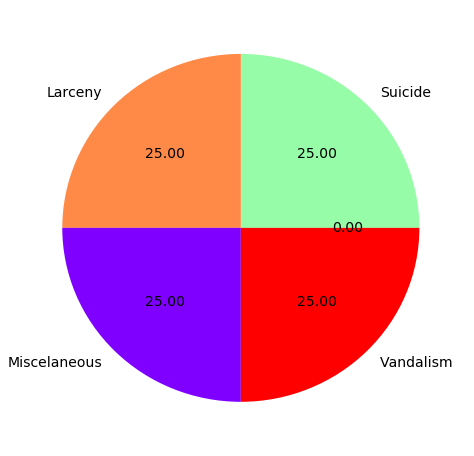

LAUREL


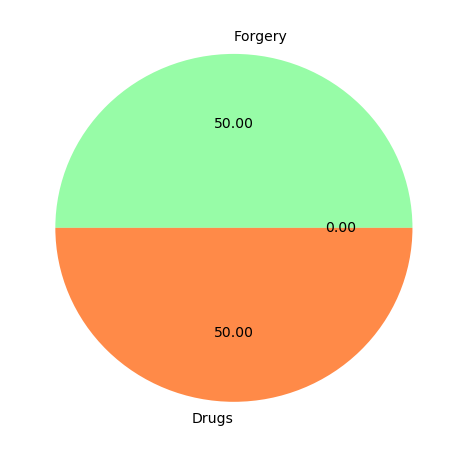

HYATTSVILLE


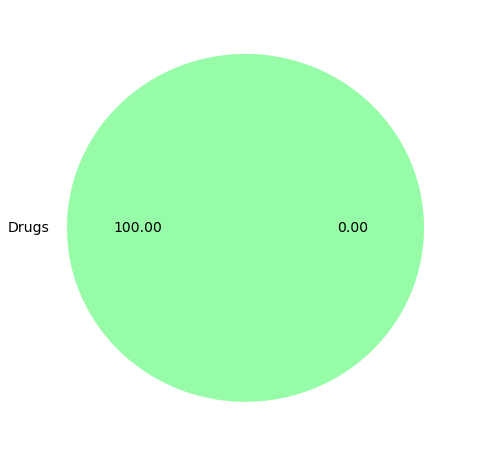

BEALLSVILLE


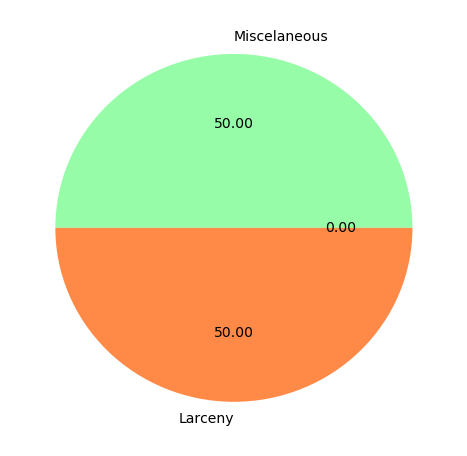

In [4]:
cities = crimes['City'].unique()
cmap = cm.get_cmap('rainbow',12)
colors=([cmap(i) for i in np.linspace(0, 1, 11)])

random.shuffle(colors)
for city in cities:
    print(city)
    crime_percent = crimes[crimes['City'] == city].loc[:,'Category'].value_counts(normalize=True)
    top_10 = crime_percent[0:10]
    top_10.name = ''
    top_10.set_value('Not in the top 10s', np.sum(crime_percent[10:]))  
    top_10.plot.pie(figsize = (8,8),autopct='%.2f', fontsize = 14, colors=colors)
    plt.show()

# Crimes by police district

In the cell bellow the percentage of the crime's profile is calculeted by policial district. All crimes were previously categorized into 26 categories. The graphs show the top 10 crimes ccurrence by distric on a pie chart, the remaining crimes are represented by the label: Not in the top 10s.

Looking at these graphs we can see that the same behaviour observed before is seen now, that is, 'Lacerny' is the crime with the highest percertage of occurrence. This time 75% of the districts has it as their highest percentage. 

OTHER


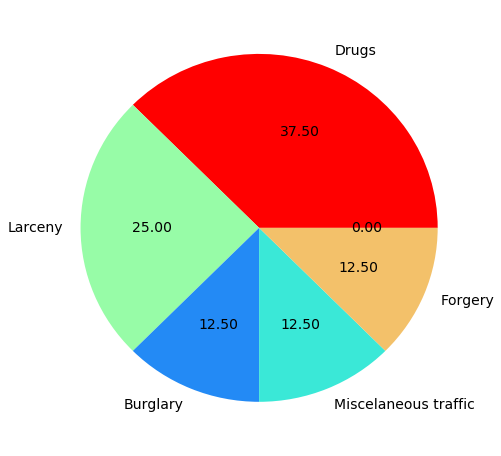

GERMANTOWN


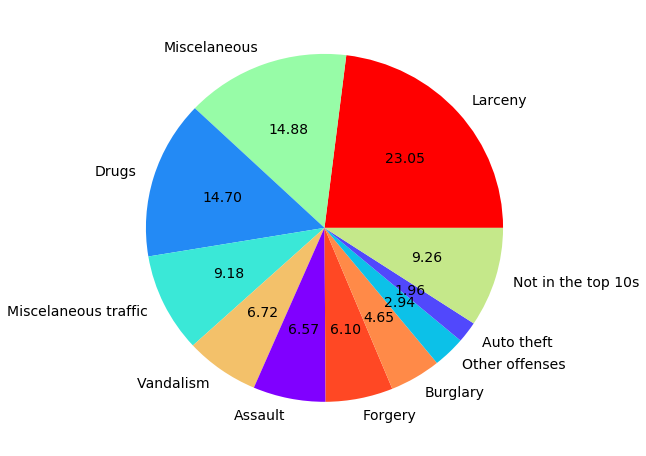

MONTGOMERY VILLAGE


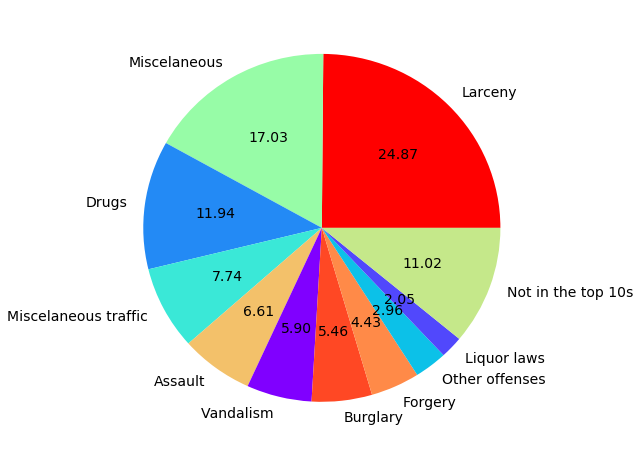

BETHESDA


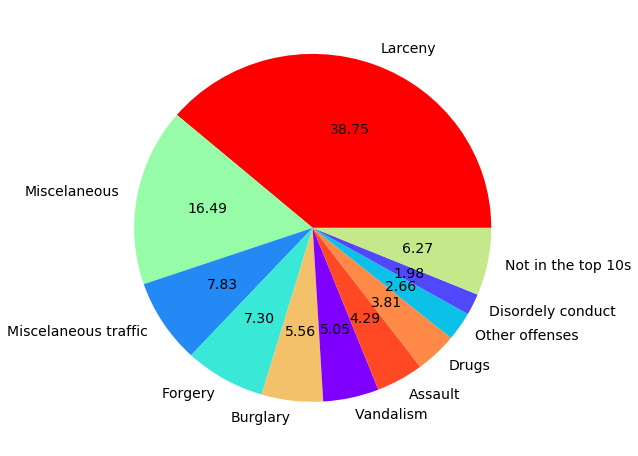

ROCKVILLE


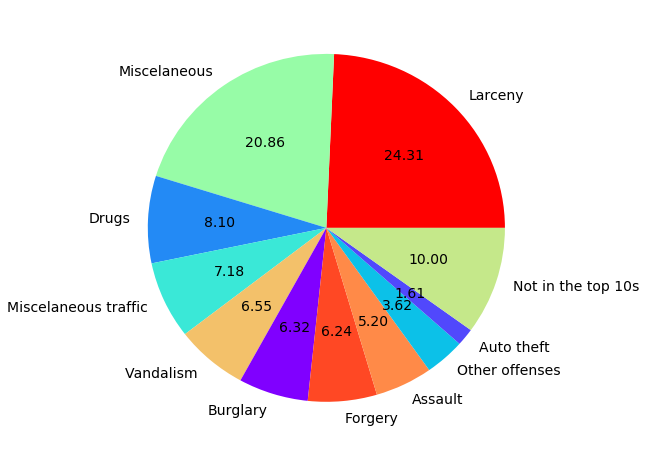

SILVER SPRING


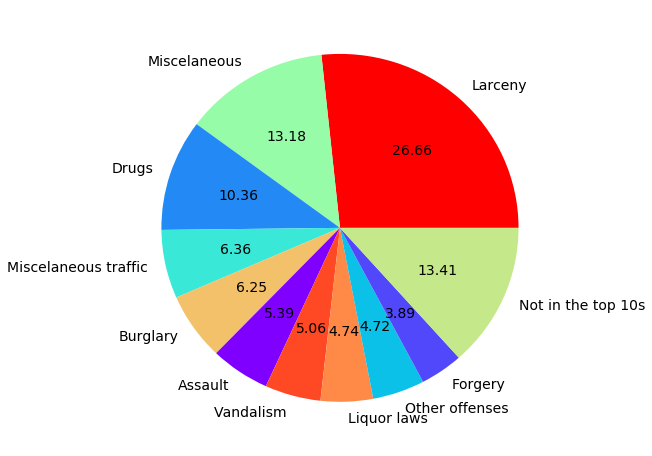

WHEATON


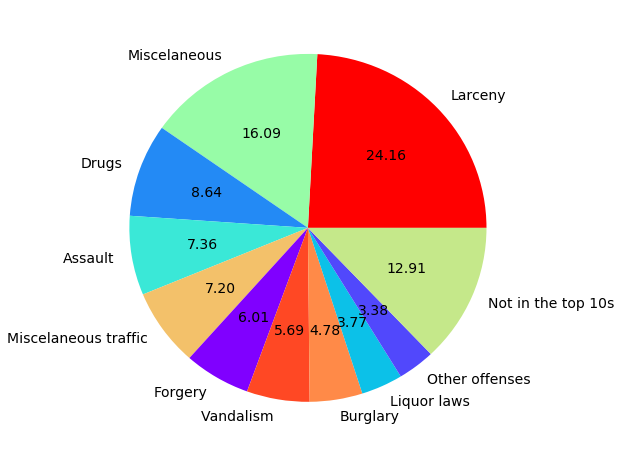

TAKOMA PARK


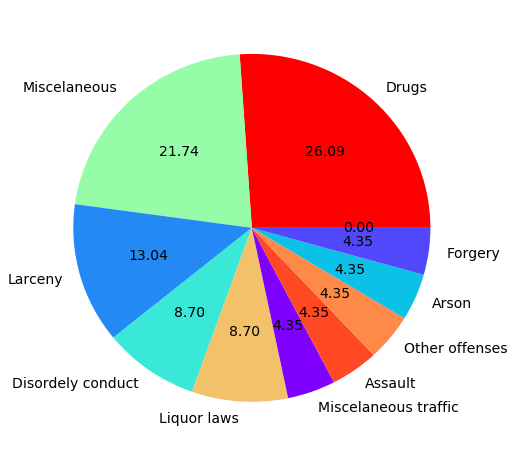

In [5]:
pd = crimes['Police District Name'].unique()
cmap = cm.get_cmap('rainbow',12)
colors=([cmap(i) for i in np.linspace(0, 1, 11)])

random.shuffle(colors)
for pol_d in pd:
    print(pol_d)
    crime_percent = crimes[crimes['Police District Name'] == pol_d].loc[:,'Category'].value_counts(normalize=True)
    top_10 = crime_percent[0:10]
    top_10.name = ''
    top_10.set_value('Not in the top 10s', np.sum(crime_percent[10:]))  
    top_10.plot.pie(figsize = (8,8),autopct='%.2f', fontsize = 14, colors=colors)
    plt.show()

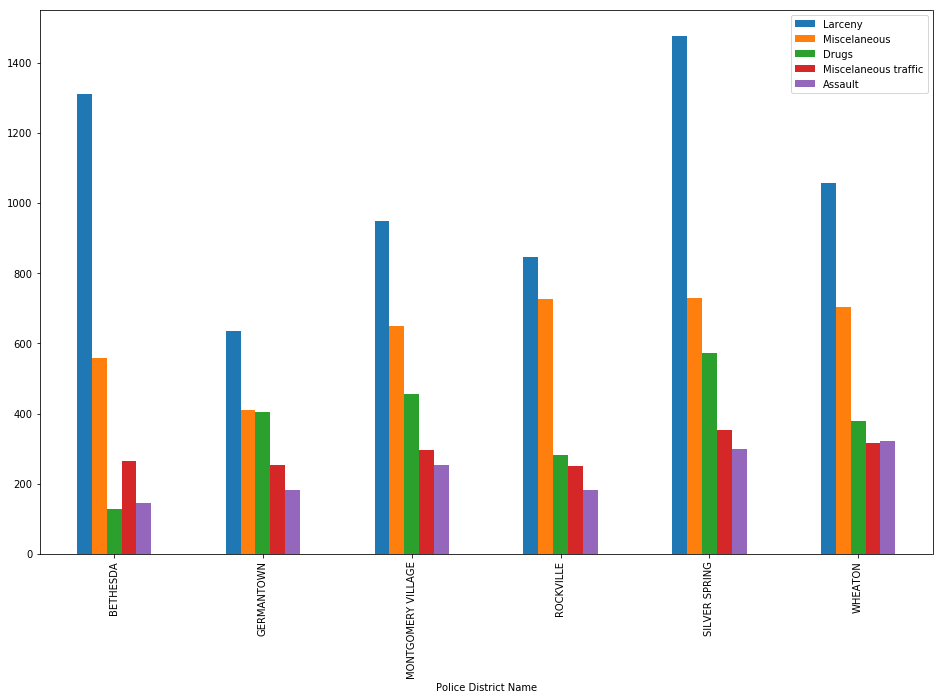

In [221]:
#Top 5 categorias nos 6 principais distritos

df_top5_pd = crimes.loc[:,['Police District Name', 'Category']].pivot_table(index = 'Police District Name', 
                                                               columns = 'Category', 
                                                               aggfunc=len).loc[:,crimes['Category'].value_counts()[0:5].index]

df_top5_pd.drop(['OTHER', 'TAKOMA PARK']).plot.bar(figsize = (16,10))



# Scatter graph using crime's location

The graph shown in the cell bellow, was created using crime's location. The idea of this chart is to give a vision of the crime's dispersal in the county. This way we can see in wich region of the county there are the highest occurrences of crimes.

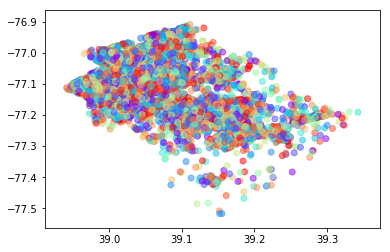

In [6]:
latitudes = crimes['Latitude'].unique()
longitudes = crimes['Longitude'].unique()

plt.scatter(latitudes, longitudes, c=colors, alpha=0.5)

plt.show()